### Dimensionality Reduce - PCA Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Scale
from sklearn.model_selection import train_test_split

import preprocessing

In [8]:
#Import data
xtrain = pd.read_csv("Xtrain.csv")
ytrain = pd.read_csv("Ytrain.csv")
records = xtrain.copy()
records['ChargeOff'] = ytrain['ChargeOff']

In [9]:
encoded_records = preprocessing.all_preprocess_with_label_encoding(records)
x = encoded_records.drop(columns='ChargeOff')
y = encoded_records['ChargeOff']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

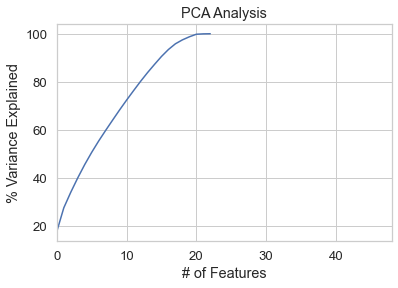

In [10]:
scaler=StandardScaler()
train_x_scale=scaler.fit_transform(x_train)

pca=PCA(n_components=23)
pca.fit(train_x_scale)

var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#lets see Cumulative Variance plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1.2,style="whitegrid")
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xlim(0,48)
plt.style.context('seaborn-whitegrid')

plt.plot(var1)